# <p style="text-align:center">EE 379K: Lab One</p>
# <p style="text-align:center">Kyle Grier and Stefan Bordovsky</p>
#### <p style="text-align:center">Due: Monday, 9/11, 3:00pm</p>


<p><b>Comments/Remarks:</b> Submit one report for each group of two people. The report should
include a pdf of your code, your results (plots, or output, as applicable), and also any discussion,
again as applicable. Also submit all your code. For this lab, you can submit in either .ipynb format
or .py format. If you choose to submit .py files, submit them in the format problemX.py or if you
need, problemXa.py, problemXb.py, and so on.</p>

<p>
    <h1>Programming Questions</h1>
    <br>
    <ol type="1">
        <li>Create 1000 samples from a Gaussian distribution with mean -10 and standard deviation 5.
            Create another 1000 samples from another independent Gaussian with mean 10 and standard
            deviation 5.
        </li>
    </ol>
</p>


In [102]:
%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab

std_dev = 5 # std_dev for both Gaussian distributions.
s1 = np.random.normal(-10, std_dev, 1000) # mean = -10, num_samples = 1000
s2 = np.random.normal(10, std_dev, 1000) # mean = 10, num_samples = 1000

<p style="text-indent: 40px">
    (a) Take the sum of 2 these Gaussians by adding the two sets of 1000 points, point by point, and plot the histogram of the resulting 1000 points. What do <br> <div style="text-indent: 60px">you observe?</div>
    <br>
    <div style="text-indent: 60px">The histogram of values resulting from adding two Gaussians sharing the same standard deviation of 5 but with different means (-10 and 10)</div> <div style="text-indent: 60px"> converges towards a normal distribution centered around a mean of 0.</div>
</p>

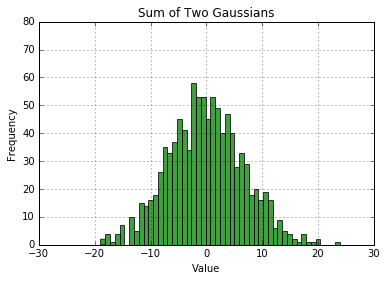

In [103]:
s_sum = s1 + s2;

# the histogram of the data
n, bins, patches = plt.hist(s_sum, 50, facecolor='green', alpha=0.75)

plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title(r'Sum of Two Gaussians')
plt.axis([-30, 30, 0, 80])
plt.grid(True)

plt.show()


<p style="text-indent: 40px">
(b) Estimate the mean and the variance of the sum.
</p>

In [104]:
mean = np.mean(s_sum)
variance = np.var(s_sum)
print("The mean of the sum is " + '%.2f' % (mean) + ", and the variance of the sum is " + '%.2f' % (variance) + ".")

The mean of the sum is -0.15, and the variance of the sum is 45.56.


<p>
    <h1>Programming Questions</h1>
    <br>
    2. <b>Central Limit Theorem.</b> Let Xi be an iid Bernoulli random variable with value {-1,1}.
Look at the random variable $Z_n = \frac{1}{n} \sum{X_i}$. By taking 1000 draws from $Z_n$, plot its histogram.
Check that for small n (say, 5-10) $Z_n$ does not look that much like a Gaussian, but when n
is bigger (already by the time n = 30 or 50) it looks much more like a Gaussian. Check also
for much bigger n: n = 250, to see that at this point, one can really see the bell curve.
</p>

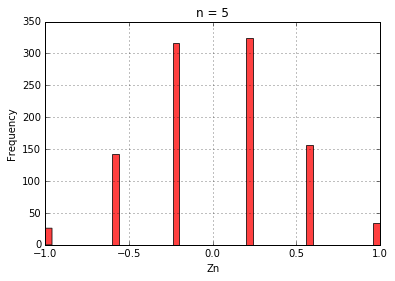

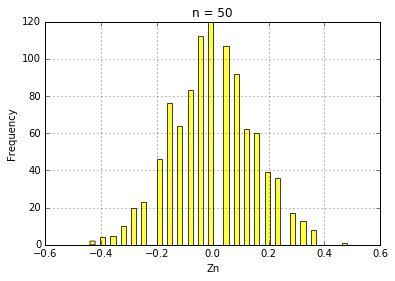

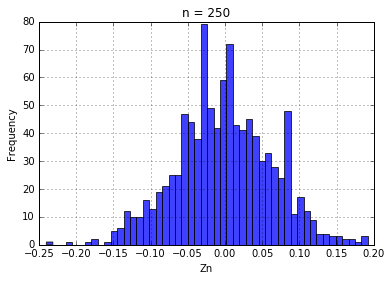

In [105]:
num_draws = 1000
Xi = [-1.0, 1.0]
Z_10 = []
Z_50 = []
Z_250 = []
Z = {}
Z[5] = Z_10
Z[50] = Z_50
Z[250] = Z_250

N_values = [5, 50, 250]
sum = numpy.random.choice(Xi)


for n in N_values:
    for j in range(num_draws):
        sum = 0
        for i in range(n):
            sum = sum + numpy.random.choice(Xi)
        sum = sum / n
        Z[n].append(sum)

colors = ['red', 'yellow', 'blue']
# the histogram of the data
for j in range (len(N_values)):
    n, bins, patches = plt.hist(Z[N_values[j]], 50, facecolor=colors[j], alpha=0.75)
    
    plt.xlabel('Zn')
    plt.ylabel('Frequency')
    plt.title(r'n = ' + '%d' % (N_values[j]))
    plt.grid(True)

    plt.show()

<p>
3. Estimate the mean and standard deviation from 1 dimensional data: generate 25,000 samples
from a Gaussian distribution with mean 0 and standard deviation 5. Then estimate the mean
and standard deviation of this gaussian using elementary numpy commands, i.e., addition,
multiplication, division (do not use a command that takes data and returns the mean or
standard deviation).
</p>

In [106]:
# Generate Gaussian distribution.
s1 = np.random.normal(0, 5, 25000) # mean = 0, num_samples = 25000
# Find mean of distribution
sum = 0
for i in range(len(s1)):
    sum = sum + s1[i]
mean = sum / 25000.0
#Find standard deviation of distribution
variance_sum = 0;
for i in range(len(s1)):
    variance_sum = variance_sum + np.power(s1[i] - mean, 2)
variance = variance_sum / 25000.0
std_dev = np.sqrt(variance)
# Print answer
print("The mean of the distribution is " + '%.2f' % (mean) + ", and the standard deviation of the distribution is " + '%.2f' % (std_dev) + ".")


The mean of the distribution is 0.04, and the standard deviation of the distribution is 4.98.


<p>
4. Estimate the mean and covariance matrix for multi-dimensional data: generate 10,000 samples
of 2 dimensional data from the Gaussian distribution
$$
 \begin{pmatrix}
  X_i \\
  Y_i \\
 \end{pmatrix}
 \sim N\bigg(\begin{pmatrix}
  -5 \\
  5 \\
 \end{pmatrix},\begin{pmatrix}
  20 & .8 \\
  .8 & 30 \\
 \end{pmatrix}\bigg)$$
Then, estimate the mean and covariance matrix for this multi-dimensional data using elementary numpy commands, i.e., addition, multiplication, division (do not use a command that
takes data and returns the mean or standard deviation).
</p>

In [121]:
num_samples = 10000
gaussian_matrix= np.random.multivariate_normal([-5, 5], [[20, 0.8],[0.8, 30]], num_samples)

mean_matrix = numpy.zeros(2)
for i in range(num_samples):
    mean_matrix[0] += gaussian_matrix[i][0]
    mean_matrix[1] += gaussian_matrix[i][1]
mean_matrix[0] /= num_samples # X1 mean
mean_matrix[1] /= num_samples # X2 mean

covariance_matrix = numpy.zeros((2,2))
for i in range(num_samples):
    covariance_matrix[0][0] += np.power((gaussian_matrix[i][0] - mean_matrix[0]), 2)
    covariance_matrix[1][1] += np.power((gaussian_matrix[i][1] - mean_matrix[1]), 2)
    covariance_matrix[0][1] += (gaussian_matrix[i][0] - mean_matrix[0]) * (gaussian_matrix[i][1] - mean_matrix[1])
    covariance_matrix[1][0] += (gaussian_matrix[i][0] - mean_matrix[0]) * (gaussian_matrix[i][1] - mean_matrix[1])
covariance_matrix[0][0] /= (num_samples - 1)
covariance_matrix[1][1] /= (num_samples - 1)
covariance_matrix[1][0] /= (num_samples - 1)
covariance_matrix[0][1] /= (num_samples - 1)
print("Resulting mean matrix: ")
print(mean_matrix)
print("Resulting covariance matrix: ")
print(covariance_matrix)

Resulting mean matrix: 
[-4.92914965  4.98154572]
Resulting covariance matrix: 
[[ 20.335763     0.63474484]
 [  0.63474484  29.65615661]]


<p>
5. Download from Canvas/Files the dataset PatientData.csv.
1
Each row is a patient and the last column is the condition that the patient has. Do data
exploration using Pandas and other visualization tools to understand what you can about the
dataset. For example:
<br><br>
<div style="text-indent: 40px">(a) How many patients and how many features are there?</div>
</p>

In [123]:
import pandas as pd

df = pd.read_csv('PatientData.csv')
df

,75,0,190,80,91,193,371,174,121,-16,...,0.0.38,9.0,-0.9,0.0.39,0.0.40,0.9.2,2.9.1,23.3,49.4,8
0,56,1,165,64,81,174,401,149,39,25,...,0.0,8.5,0.0,0.0,0.0,0.2,2.1,20.4,38.8,6
1,54,0,172,95,138,163,386,185,102,96,...,0.0,9.5,-2.4,0.0,0.0,0.3,3.4,12.3,49.0,10
2,55,0,175,94,100,202,380,179,143,28,...,0.0,12.2,-2.2,0.0,0.0,0.4,2.6,34.6,61.6,1
3,75,0,190,80,88,181,360,177,103,-16,...,0.0,13.1,-3.6,0.0,0.0,-0.1,3.9,25.4,62.8,7
4,13,0,169,51,100,167,321,174,91,107,...,-0.6,12.2,-2.8,0.0,0.0,0.9,2.2,13.5,31.1,14
5,40,1,160,52,77,129,377,133,77,77,...,0.0,6.5,0.0,0.0,0.0,0.4,1.0,14.3,20.5,1
6,49,1,162,54,78,0,376,157,70,67,...,0.0,8.2,-1.9,0.0,0.0,0.1,0.5,15.8,19.8,1
7,44,0,168,56,84,118,354,160,63,61,...,0.0,7.0,-1.3,0.0,0.0,0.6,2.1,12.5,30.9,1
8,50,1,167,67,89,130,383,156,73,85,...,-0.6,10.8,-1.7,0.0,0.0,0.8,0.9,20.1,25.1,10
9,62,0,170,72,102,135,401,156,83,72,...,-0.5,9.0,-2.0,0.0,0.0,0.8,0.9,12.3,19.3,3


<p style="text-indent: 60px">
    There are 450 patients and 279 features.
    <br><br>
    <div style="text-indent: 40px">(b) What is the meaning of the first 4 features? See if you can understand what they mean.</div>
    <div style="text-indent: 60px">The first feature could be patient age, as it seems to range between single digit integers and two digit numbers as high as 78. </div>
    <div style="text-indent: 60px">The second feature could be gender, with 0 representing female and 1 representing male. This may be assumed because there is a near 50-50 split</div><div style="text-indent: 80px"> of 0's and 1's, and gender is a common identifier used in medical records.</div>
    <div style="text-indent: 60px">The third feature is probably systolic blood pressure, as systolic blood pressure usually ranges between 90 and 250</div> <div style="text-indent: 80px">(http://www.bloodpressureuk.org/microsites/u40/Home/facts/Whatisnormal)</div>
    <div style="text-indent: 60px">The fourth feature is most likely diastolic blood pressure, as diastolic blood pressure usually ranges between 60 and 140.</div>
</p>

<p style="text-indent: 60px">
    (c) Are there missing values? Replace them with the average of the corresponding feature column
</p>

In [4]:
import numpy as np
from numpy.linalg import inv
p1 = np.array([3, 3, 3])
p2 = np.array([1, 2, 3])
p3 = np.array([0, 0, 1])
A = np.array([[1,1], [1,0], [1,0]])
A_T = A.transpose()
A_square = np.matmul(A_T, A)
A_square_inv = inv(A_square)
A_first = np.matmul(A, A_square_inv)
P = np.matmul(A_first, A_T)
proj1 = np.matmul(P, p1)
proj2 = np.matmul(P, p2)
proj3 = np.matmul(P, p3)
print(proj1)
print(proj2)
print(proj3)


[ 3.  3.  3.]
[ 1.   2.5  2.5]
[  5.55111512e-17   5.00000000e-01   5.00000000e-01]
